In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 6

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 42)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                860       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 66        
Total params: 1,136
Trainable params: 1,136
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
35/35 [==============================] - 2s 7ms/step - loss: 1.9238 - accuracy: 0.1178 - val_loss: 1.7561 - val_accuracy: 0.2829

Epoch 00001: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 2/1000
35/35 [==============================] - 0s 4ms/step - loss: 1.7574 - accuracy: 0.2256 - val_loss: 1.6920 - val_accuracy: 0.2965

Epoch 00002: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 3/1000
35/35 [==============================] - 0s 4ms/step - loss: 1.6833 - accuracy: 0.2817 - val_loss: 1.6156 - val_accuracy: 0.3436

Epoch 00003: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 4/1000
35/35 [==============================] - 0s 3ms/step - loss: 1.6221 - accuracy: 0.3292 - val_loss: 1.5600 - val_accuracy: 0.3551

Epoch 00004: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 5/1000
35/35 [==============================] - 0s 3ms/step - loss: 1.5786 - accuracy: 0.3529 - val_lo


Epoch 00037: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 38/1000
35/35 [==============================] - 0s 3ms/step - loss: 0.9589 - accuracy: 0.6319 - val_loss: 0.5980 - val_accuracy: 0.8678

Epoch 00038: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 39/1000
35/35 [==============================] - 0s 3ms/step - loss: 0.9500 - accuracy: 0.6367 - val_loss: 0.5819 - val_accuracy: 0.8773

Epoch 00039: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 40/1000
35/35 [==============================] - 0s 3ms/step - loss: 0.9402 - accuracy: 0.6410 - val_loss: 0.5784 - val_accuracy: 0.8828

Epoch 00040: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 41/1000
35/35 [==============================] - 0s 3ms/step - loss: 0.9299 - accuracy: 0.6398 - val_loss: 0.5768 - val_accuracy: 0.8732

Epoch 00041: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 42/1000
35/35 [==

35/35 [==============================] - 0s 4ms/step - loss: 0.8346 - accuracy: 0.6889 - val_loss: 0.4800 - val_accuracy: 0.8903

Epoch 00074: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 75/1000
35/35 [==============================] - 0s 4ms/step - loss: 0.8427 - accuracy: 0.6771 - val_loss: 0.4746 - val_accuracy: 0.8950

Epoch 00075: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 76/1000
35/35 [==============================] - 0s 4ms/step - loss: 0.8234 - accuracy: 0.6864 - val_loss: 0.4634 - val_accuracy: 0.8957

Epoch 00076: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 77/1000
35/35 [==============================] - 0s 4ms/step - loss: 0.8276 - accuracy: 0.6796 - val_loss: 0.4677 - val_accuracy: 0.8916

Epoch 00077: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 78/1000
35/35 [==============================] - 0s 4ms/step - loss: 0.8063 - accuracy: 0.6880 - val_loss: 0.457


Epoch 00110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 111/1000
35/35 [==============================] - 0s 3ms/step - loss: 0.7816 - accuracy: 0.7071 - val_loss: 0.4156 - val_accuracy: 0.9087

Epoch 00111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 112/1000
35/35 [==============================] - 0s 3ms/step - loss: 0.7909 - accuracy: 0.7046 - val_loss: 0.4212 - val_accuracy: 0.9039

Epoch 00112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 113/1000
35/35 [==============================] - 0s 3ms/step - loss: 0.7839 - accuracy: 0.7112 - val_loss: 0.4196 - val_accuracy: 0.9052

Epoch 00113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 114/1000
35/35 [==============================] - 0s 3ms/step - loss: 0.7862 - accuracy: 0.7065 - val_loss: 0.4272 - val_accuracy: 0.9046

Epoch 00114: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 115/1000
35/3

35/35 [==============================] - 0s 4ms/step - loss: 0.7717 - accuracy: 0.7112 - val_loss: 0.4104 - val_accuracy: 0.9018

Epoch 00147: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 148/1000
35/35 [==============================] - 0s 4ms/step - loss: 0.7535 - accuracy: 0.7151 - val_loss: 0.4086 - val_accuracy: 0.9012

Epoch 00148: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 149/1000
35/35 [==============================] - 0s 3ms/step - loss: 0.7597 - accuracy: 0.7196 - val_loss: 0.4022 - val_accuracy: 0.9052

Epoch 00149: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 150/1000
35/35 [==============================] - 0s 3ms/step - loss: 0.7614 - accuracy: 0.7158 - val_loss: 0.4107 - val_accuracy: 0.9039

Epoch 00150: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 151/1000
35/35 [==============================] - 0s 3ms/step - loss: 0.7490 - accuracy: 0.7190 - val_loss: 0


Epoch 00183: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 00183: early stopping


In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

12/12 [==============================] - 0s 3ms/step - loss: 0.3994 - accuracy: 0.9012


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[5.9645854e-02 4.6795920e-02 8.6289865e-01 4.5993613e-05 1.1448929e-02
 1.9164642e-02]
2


# Confusion matrix

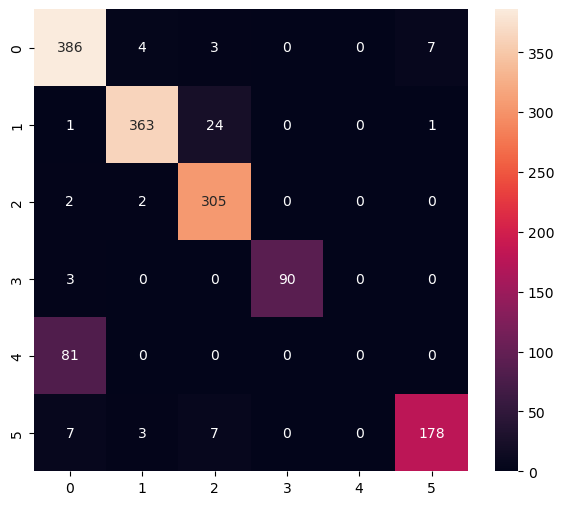

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.96      0.88       400
           1       0.98      0.93      0.95       389
           2       0.90      0.99      0.94       309
           3       1.00      0.97      0.98        93
           4       0.00      0.00      0.00        81
           5       0.96      0.91      0.93       195

    accuracy                           0.90      1467
   macro avg       0.77      0.79      0.78      1467
weighted avg       0.86      0.90      0.88      1467



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\THOLE~1\AppData\Local\Temp\tmpq2f6tpvw\assets


6432

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[5.9694212e-02 4.6793435e-02 8.6286545e-01 4.6060664e-05 1.1452779e-02
 1.9148014e-02]
2
